In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn 
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Acciuracy on test set : {:.3f}".format(tree.score(X_train, y_train)))
print("Acciuracy on test set : {:.3f}".format(tree.score(X_test, y_test)))

Acciuracy on test set : 1.000
Acciuracy on test set : 0.937


In [3]:
#Pruning to lower the overfitting (max_depth)
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Acciuracy on test set : {:.3f}".format(tree.score(X_train, y_train)))
print("Acciuracy on test set : {:.3f}".format(tree.score(X_test, y_test)))

Acciuracy on test set : 0.988
Acciuracy on test set : 0.951


In [4]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot",class_names=["malignant","benign"], feature_names=cancer.feature_names, impurity=False, filled = True
              )

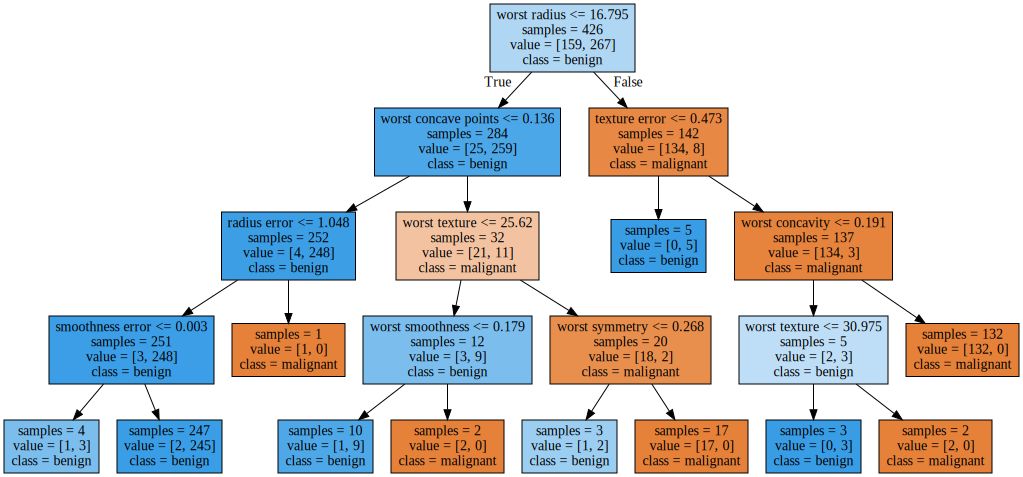

In [5]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [6]:
print("Feature Importance: \n {}".format(tree.feature_importances_))

Feature Importance: 
 [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


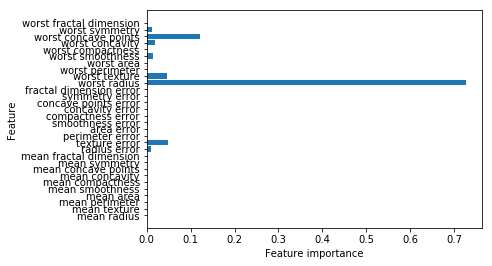

In [10]:
#visualize the feature importances
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

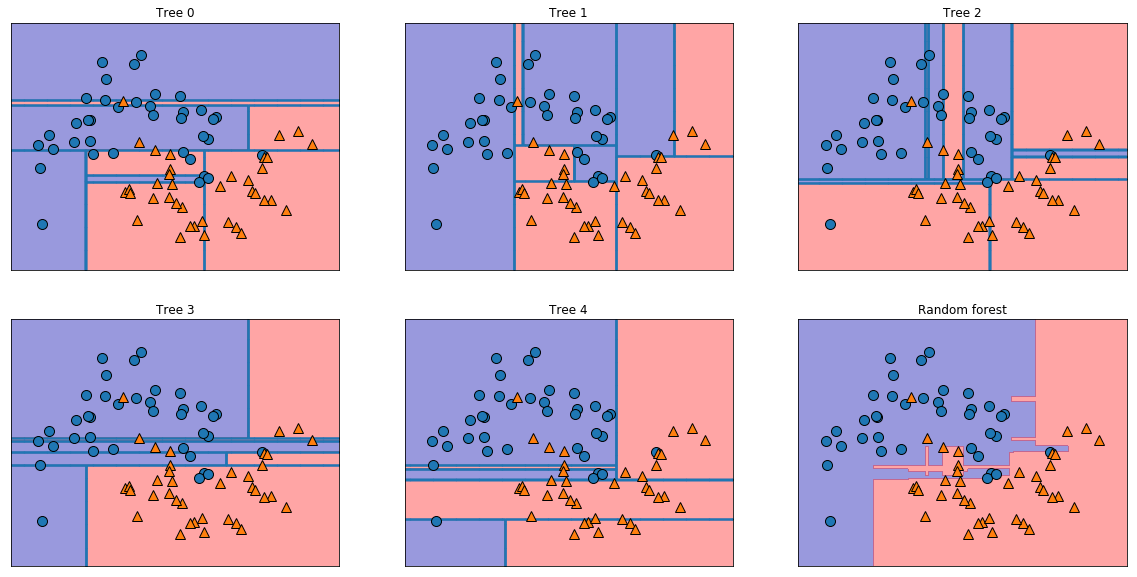

In [14]:
fig, axes = plt.subplots(2,3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("Random forest")
mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Training set score : {:.3f}".format(forest.score(X_train, y_train)))
print("Test set score : {:.3f}".format(forest.score(X_test, y_test)))

Training set score : 1.000
Test set score : 0.972
